## Modelos Intermediários

Diferentemente dos modelos supervisionados, o que eu chamo de **Modelos Intermediários** se referem a modelos que demandam de uma técnica mais apurada e apresentam um pouco mais de complexidade, mesmo sendo todos eles considerados modelos supervisionados.

---

### Base

In [28]:
""" Obter dados e separar treino e teste """

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar o dataset Iris
data = load_iris()
X = data.data      # características (features)
y = data.target    # rótulos (classes)

# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Árvores de Decisão

Uma árvore de decisão é um modelo de aprendizado de máquina utilizado para tomar decisões ou fazer previsões com base em perguntas simples do tipo “sim ou não”. Ela funciona como um fluxograma: a cada nó da árvore, o modelo faz uma pergunta sobre uma característica dos dados (por exemplo, “a idade é maior que 30?”) e, dependendo da resposta, segue por um caminho até chegar a uma decisão final.

Esse método pode ser usado tanto para classificação (como prever se um cliente vai ou não cancelar um serviço) quanto para regressão (como estimar um valor numérico).

In [17]:
""" Treinar o modelo de Árvore de Decisão """

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo de Árvore de Decisão
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
acuracia = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {acuracia:.2f}")

Acurácia do modelo: 1.00


O modelo treinado trouxe uma acurácia de 100%, o parâmetro **"max_depth=3"** define quantos a quantos níveis a arvore pode chegar.

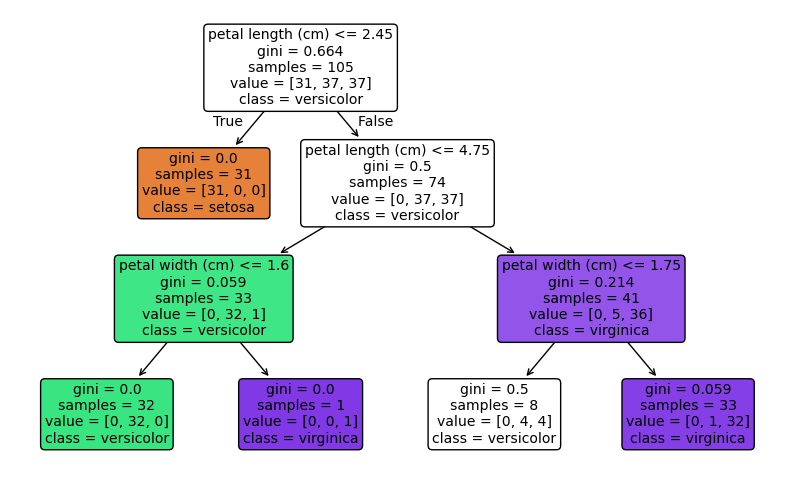

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotar a árvore
plt.figure(figsize=(10, 6))
plot_tree(
    model,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True
)
plt.show()

O código acima traz uma representação visual de como ficou a arvore de decisão e quais caminhos levaram ao resultado final.

- Cada nó mostra uma pergunta (ex: petal length (cm) ≤ 2.45).
- Gini indica o quão “misturadas” estão as classes (quanto menor, melhor).
- Samples é a quantidade de dados naquele nó.
- Value mostra quantos exemplos de cada classe existem ali.
- Cores indicam a classe predominante no nó.
- Os ramos da esquerda são respostas “sim/verdadeiro” e os da direita “não/falso”.

### Random Forest

Random Forest é um algoritmo de machine learning usado para classificação e regressão que funciona como um “conjunto de decisões”.

Em vez de criar apenas uma árvore de decisão, ele constrói muitas árvores usando subconjuntos aleatórios dos dados e das variáveis. Cada árvore faz sua própria previsão, e o Random Forest combina todas elas (por voto, no caso de classificação, ou média, no caso de regressão) para chegar ao resultado final.

A principal vantagem do Random Forest é que ele reduz o overfitting comum em árvores de decisão individuais, tornando o modelo mais robusto e preciso. Além disso, ele lida bem com dados não lineares, é relativamente fácil de usar e permite medir a importância das variáveis, o que ajuda a entender quais atributos mais influenciam as previsões.

In [19]:
""" Treinar o modelo Random Forest """

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo Random Forest
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 1.00


In [20]:
""" Obter dados de importancia das variáveis """

import pandas as pd

# Importância das variáveis
importances = model.feature_importances_

# Criar DataFrame organizado
feature_importance_df = pd.DataFrame({
    "feature": data.feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feature_importance_df)

             feature  importance
3   petal width (cm)    0.433982
2  petal length (cm)    0.417308
0  sepal length (cm)    0.104105
1   sepal width (cm)    0.044605


Com o modelo que atingiu 100% de acurácia utilizando **n_estimators = 100**, também é possível extrair a importância de cada variável de entrada.

No exemplo apresentado, a variável **petal length (cm)** possui a maior importância, indicando que ela é a feature que mais influencia as decisões do modelo e, consequentemente, o resultado final das previsões.

### Gradient Boosting

Gradient Boosting é uma técnica de machine learning que combina vários modelos simples, normalmente árvores de decisão pequenas, para criar um modelo mais preciso. Esses modelos são treinados um após o outro, e cada novo modelo aprende a corrigir os erros cometidos pelos anteriores, focando nos exemplos que o modelo ainda não conseguiu prever bem.

O processo funciona minimizando o erro aos poucos, usando o gradiente da função de perda para guiar o aprendizado. Com isso, o modelo melhora gradualmente suas previsões. O Gradient Boosting é muito usado por ser eficiente e preciso, servindo de base para algoritmos conhecidos como XGBoost, LightGBM e CatBoost.

In [24]:
""" Treinar o modelo Gradient Boosting """

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# 3. Criar o modelo Gradient Boosting
model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# 4. Treinar o modelo
model.fit(X_train, y_train)

# 5. Fazer previsões
y_pred = model.predict(X_test)

# 6. Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 1.00


In [25]:
""" Obter dados de importancia das variáveis """

import pandas as pd

# Importância das variáveis
importances = model.feature_importances_

# Criar DataFrame organizado
feature_importance_df = pd.DataFrame({
    "feature": data.feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feature_importance_df)

             feature  importance
2  petal length (cm)    0.595202
3   petal width (cm)    0.383604
1   sepal width (cm)    0.017775
0  sepal length (cm)    0.003420


### SVM

SVM (Support Vector Machine) é um algoritmo de machine learning usado para classificação e regressão que busca separar os dados da melhor forma possível. Ele funciona encontrando uma linha (ou plano, em dimensões maiores) que divide as classes, escolhendo aquela que deixa a maior margem entre os pontos mais próximos de cada classe, chamados de vetores de suporte. Quanto maior essa margem, melhor tende a ser a capacidade de generalização do modelo.

O SVM é conhecido por ser robusto e preciso, especialmente em conjuntos de dados menores e com muitas variáveis.

In [26]:
""" Treinar o modelo SVM """

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Criar o modelo SVM
model = SVC(
    kernel='rbf',   # kernel radial (não linear)
    C=1.0,
    gamma='scale'
)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

Acurácia do modelo: 1.00


### Conclusão

A maioria desses modelos tem origem na **Árvore de Decisão**, que analisa os dados com base na **entropia** das features para definir a criação dos nós.

Entretanto, cada abordagem procura **minimizar erros** e **melhorar a acurácia**, utilizando métodos próprios para otimizar os resultados.